In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models

input_shape = (90,90,3)
model = models.Sequential()

model.add(layers.Input(shape=input_shape))
model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 88, 88, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 44, 44, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 42, 42, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 19, 19, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 721,025 (2.75 MB)

 Trainable params: 721,025 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from keras import optimizers

optimizer = optimizers.RMSprop(learning_rate=1e-4)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [5]:
train_dir = r'D:\Coding\AI\Kaggle Dataset Practice (CNN)\Face Mask Dataset\Train'
validation_dir = r'D:\Coding\AI\Kaggle Dataset Practice (CNN)\Face Mask Dataset\Validation'

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(90,90), batch_size=30 , class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(90,90), batch_size=20 , class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (30, 90, 90, 3)
labels batch shape: (30,)


In [7]:
from tensorflow.keras.models import Sequential
history = model.fit(train_generator, steps_per_epoch=100, epochs=20, validation_data=validation_generator, validation_steps=25)

Epoch 1/20


C:\Users\Mohsin Raza\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 165ms/step - accuracy: 0.7070 - loss: 0.5744 - val_accuracy: 0.8960 - val_loss: 0.2884
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 150ms/step - accuracy: 0.9107 - loss: 0.2470 - val_accuracy: 0.9600 - val_loss: 0.1554
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - accuracy: 1.0000 - loss: 0.0814

C:\Users\Mohsin Raza\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 161ms/step - accuracy: 0.9297 - loss: 0.2009 - val_accuracy: 0.9520 - val_loss: 0.1470
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.9536 - loss: 0.1253 - val_accuracy: 0.9633 - val_loss: 0.1020
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.9446 - loss: 0.1401 - val_accuracy: 0.9520 - val_loss: 0.1350
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.9573 - loss: 0.1198 - val_accuracy: 0.9733 - val_loss: 0.0885
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.9672 - loss: 0.0927 - val_accuracy: 0.9580 - val_loss: 0.1104
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9666 - loss: 0.0832 - val_accuracy: 0.9833 - val_loss: 0.0641
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 158ms/step - accuracy: 0.9718 - loss: 0.0851 - val_accuracy: 0.9660 - val_loss: 0.0910
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.9609 - loss: 0.1022 - val_ac

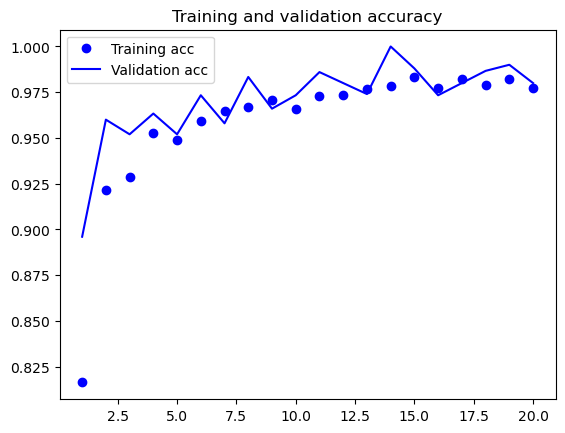

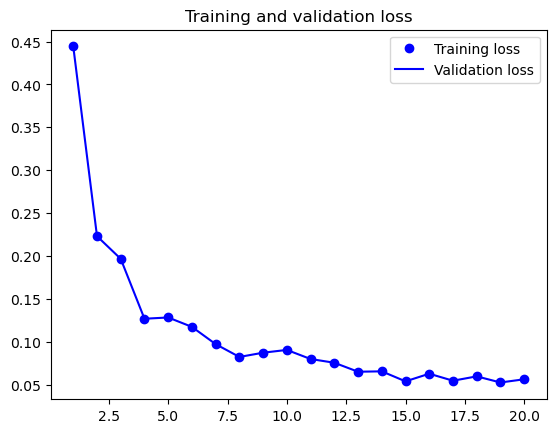

In [22]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


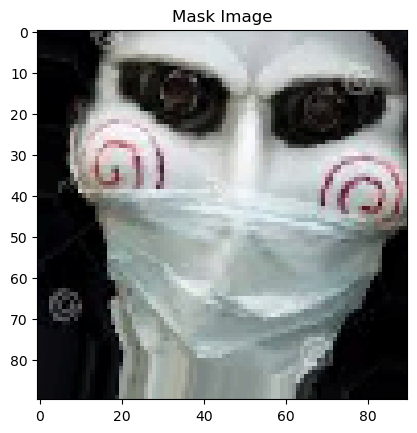

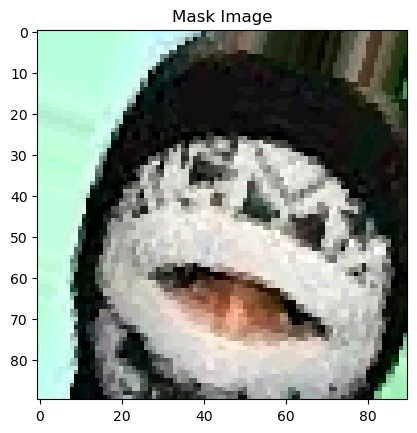

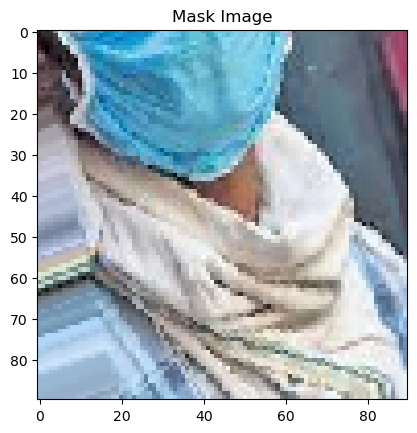

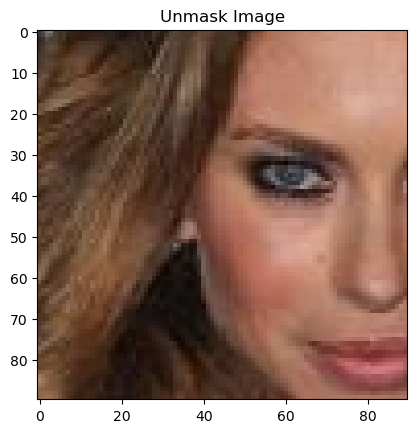

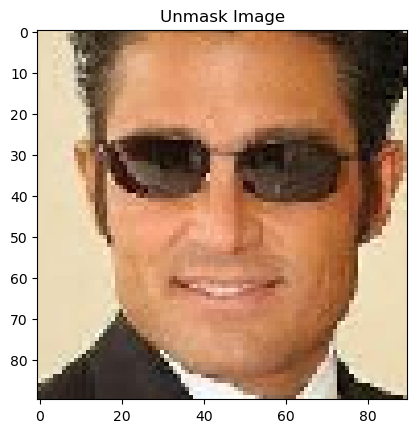

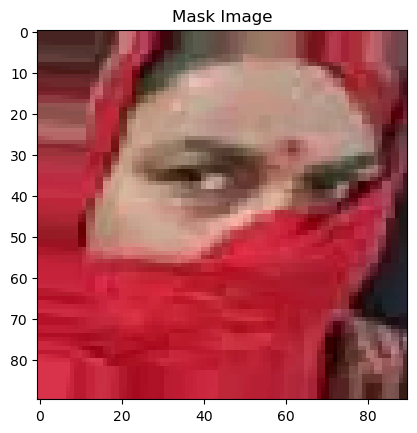

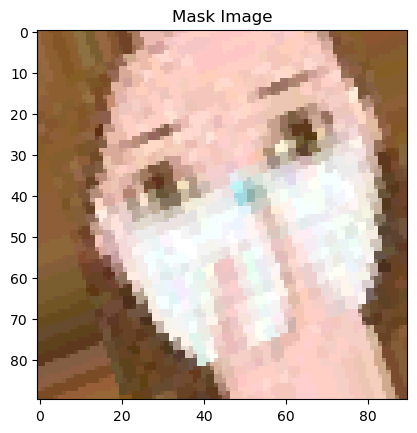

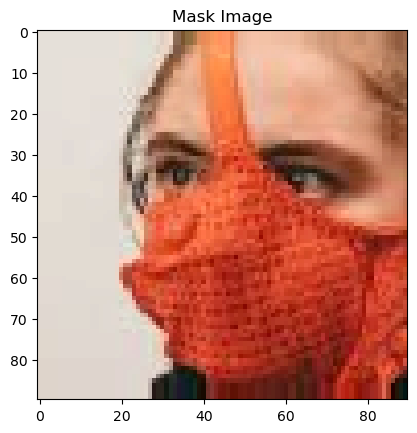

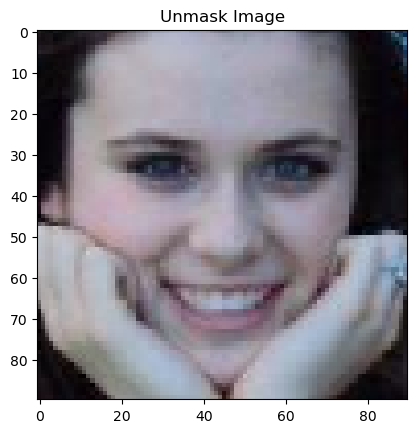

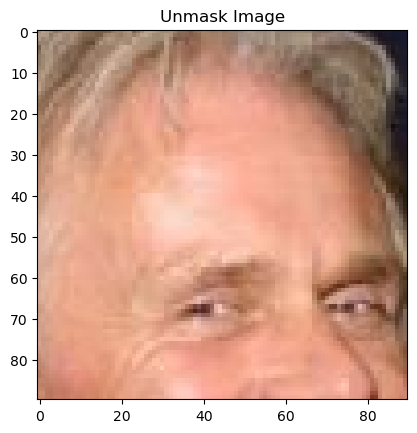

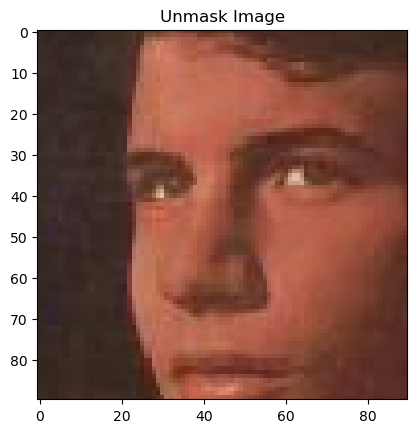

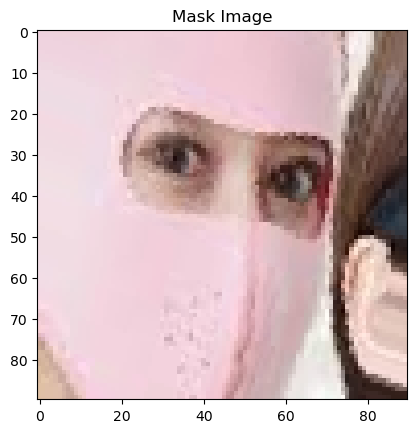

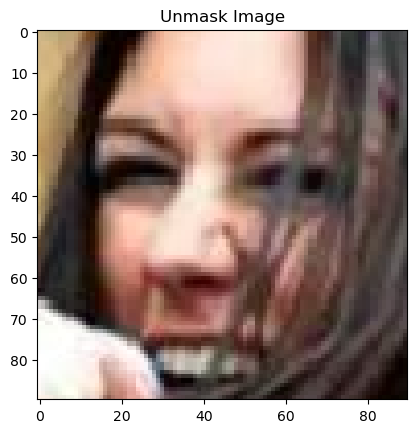

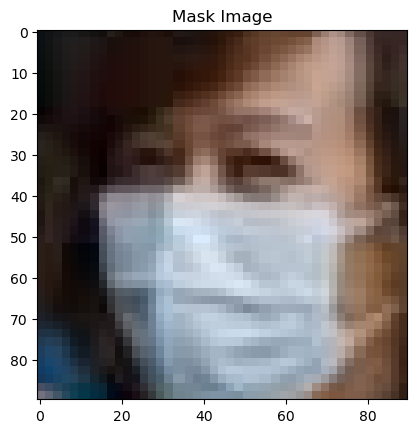

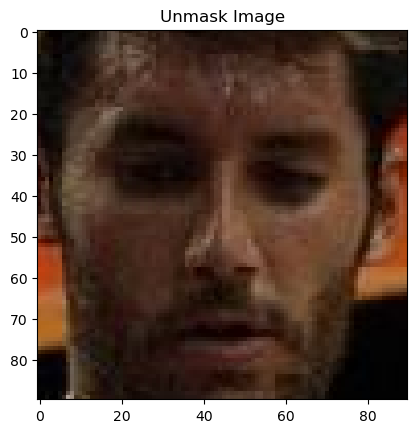

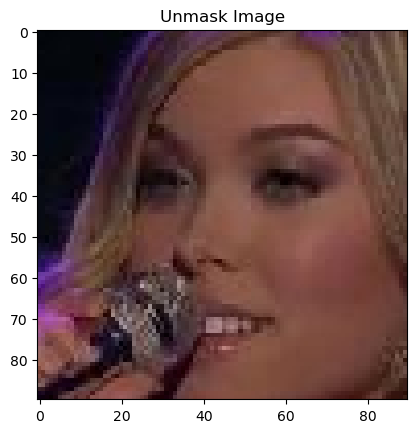

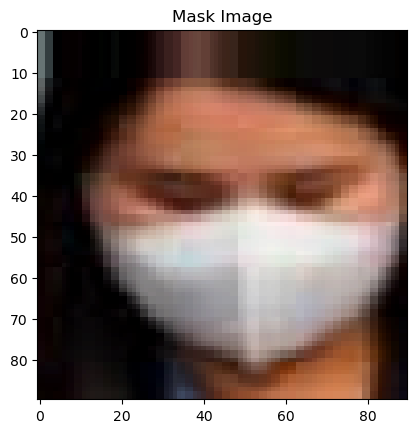

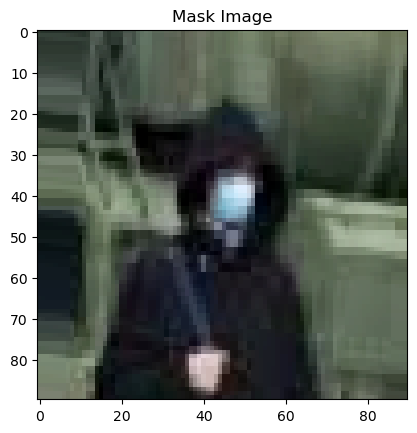

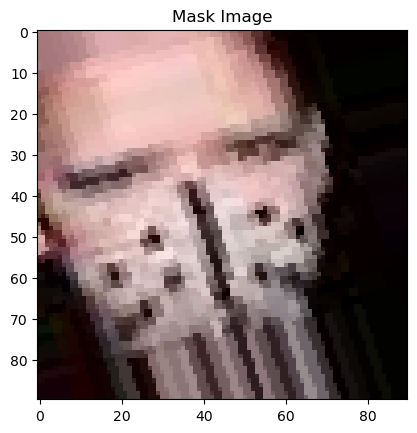

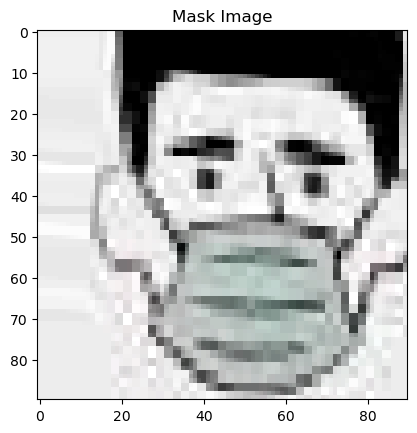

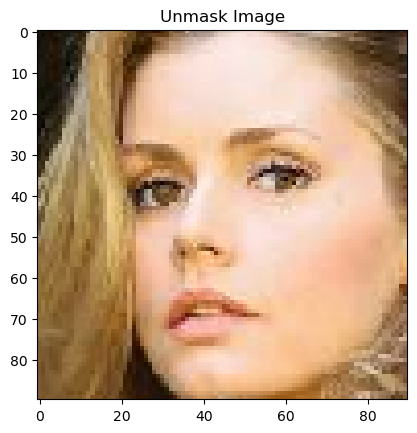

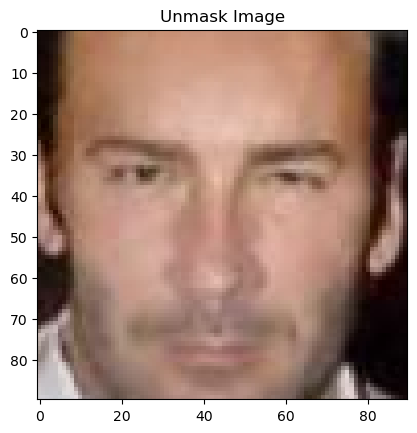

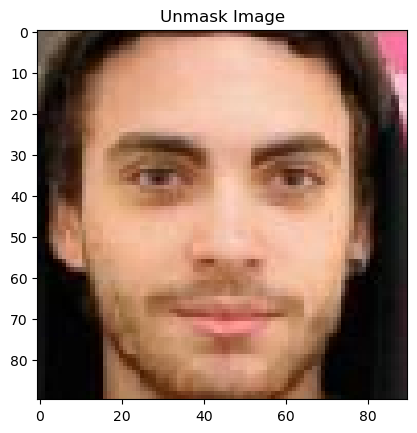

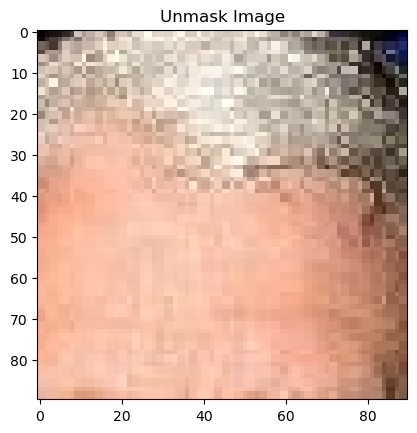

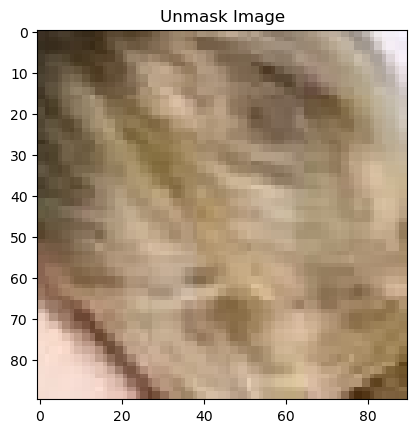

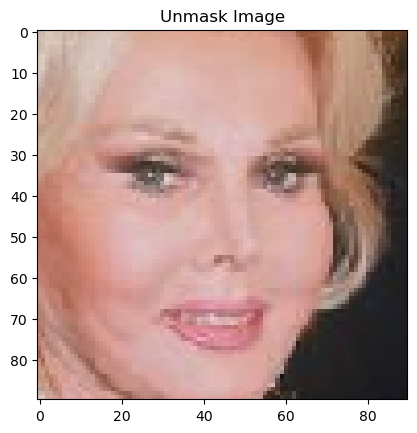

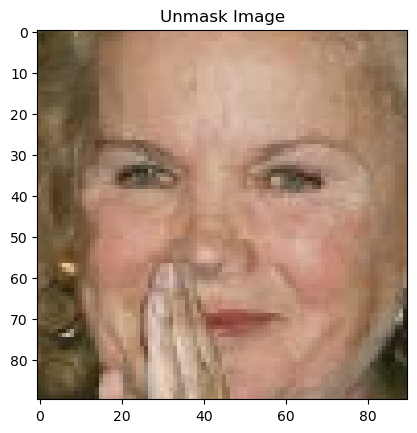

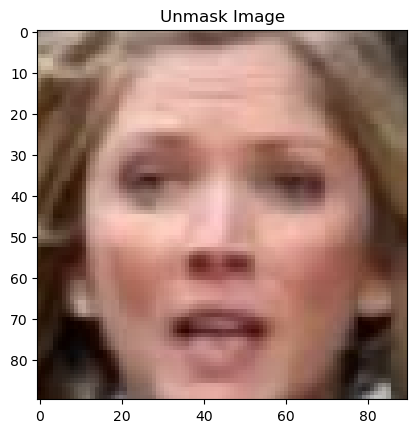

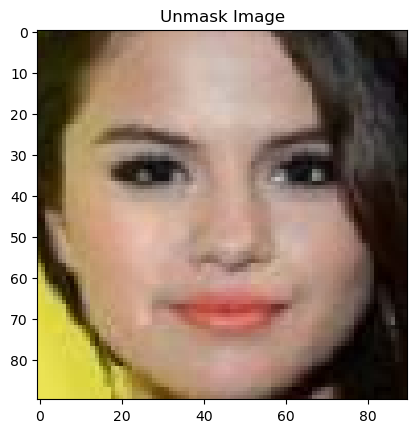

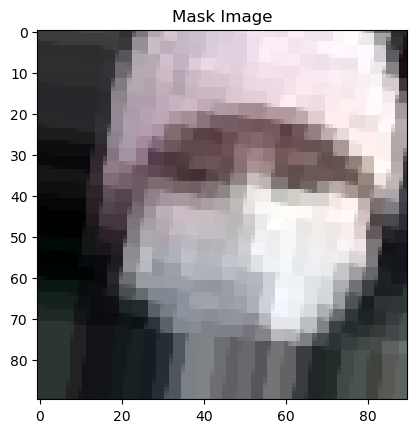

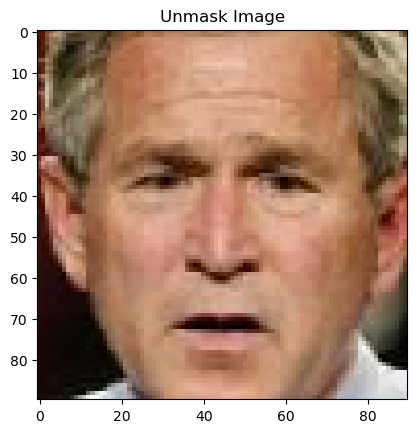

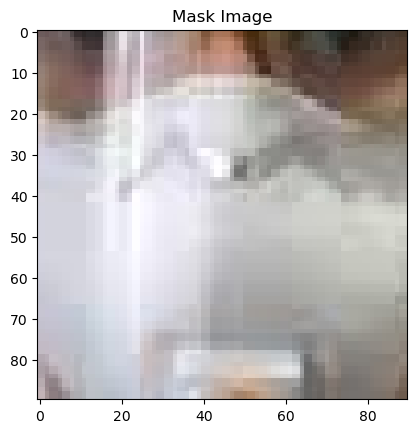

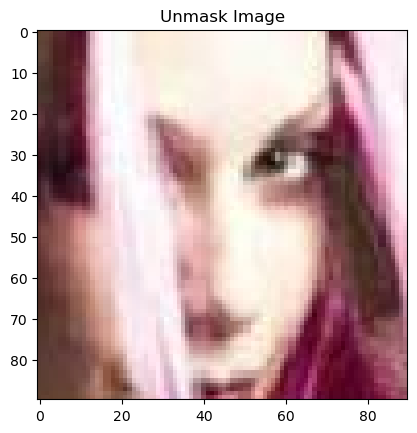

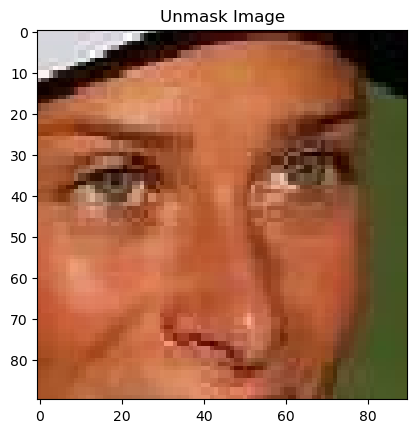

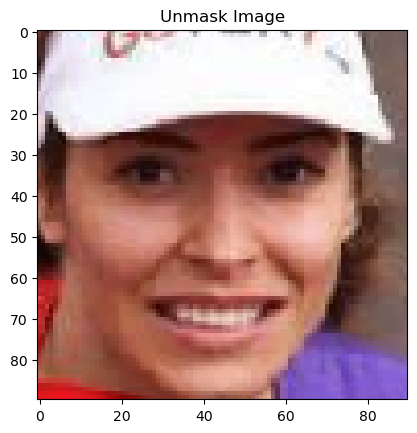

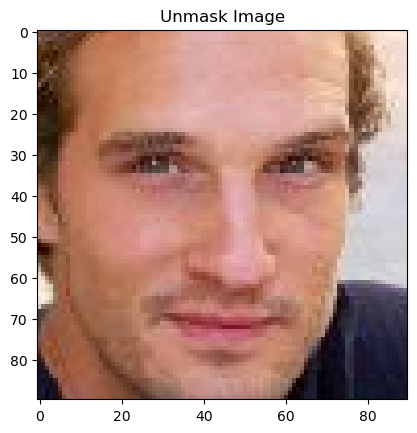

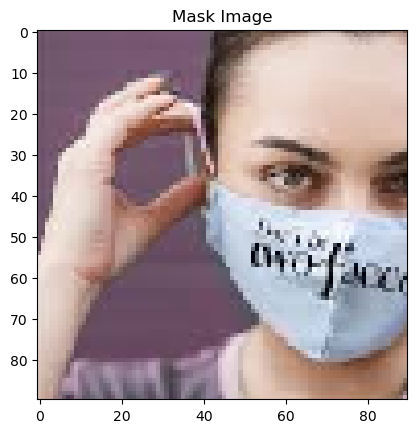

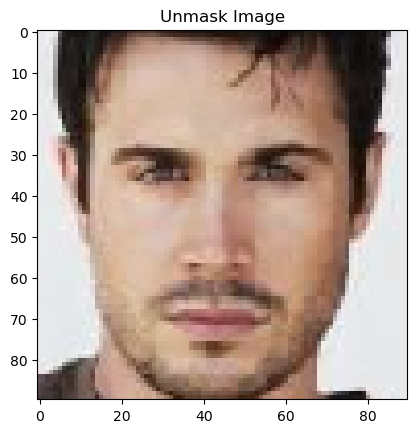

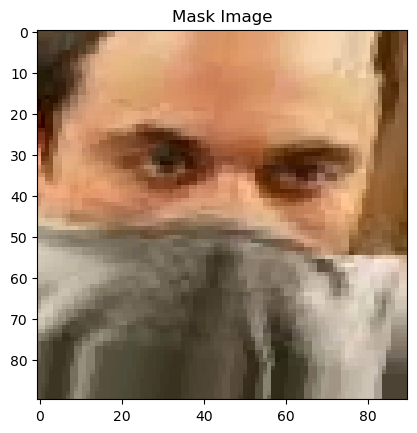

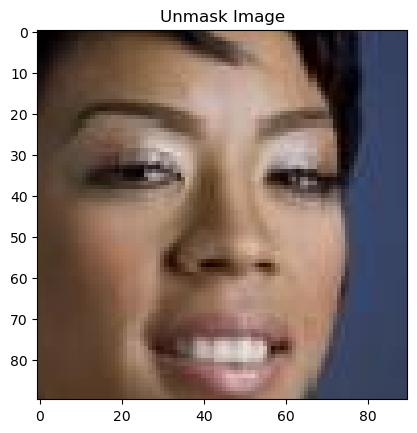

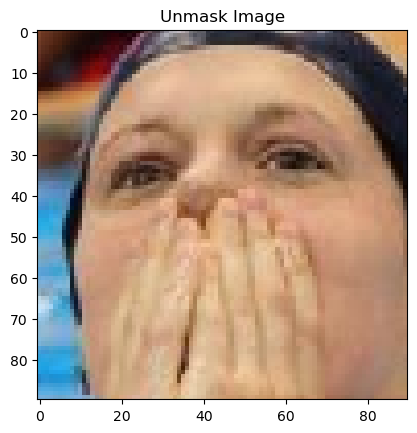

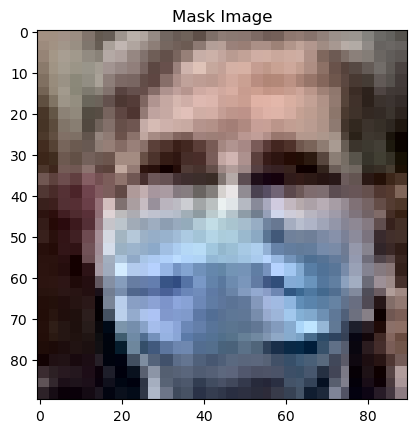

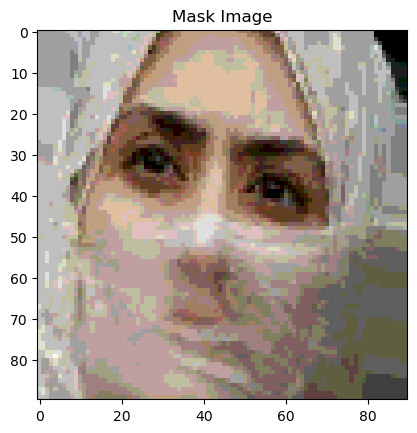

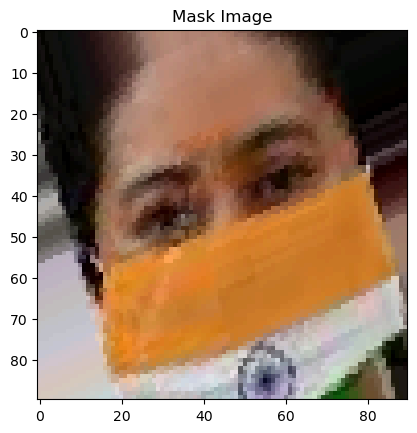

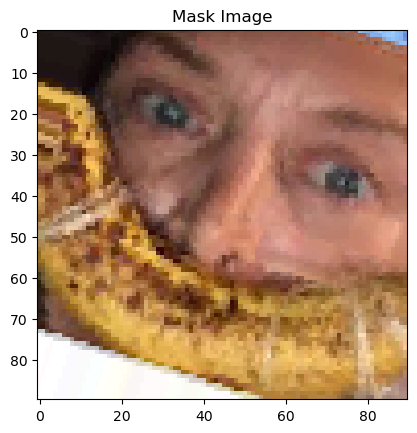

Finished processing all images!


In [38]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Define the directory containing your images
image_dir = r"D:\Coding\AI\Kaggle Dataset Practice (CNN)\Face Mask Dataset\Test"  # Replace with your directory

# List all image filenames in the directory
image_filenames = [f for f in os.listdir(image_dir) if f.endswith(".png")]

# Define empty lists to store images and predictions
images = []
predictions = []

# Loop through each image filename
for filename in image_filenames[:100]:  # Limit to 18 images for efficiency
    img_path = os.path.join(image_dir, filename)

    # Load the image and preprocess it
    img = image.load_img(img_path, target_size=(90, 90))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)  # Add batch dimension
    img_tensor /= 255.  # Normalize pixel values

    # Append the preprocessed image
    images.append(img_tensor)

# Convert the list of images to a NumPy array for prediction
images_array = np.concatenate(images)

# Make predictions using your model
model_out = model.predict(images_array)

# Loop through each image and prediction
for i, prediction in enumerate(model_out):
    predicted_class = 1 if prediction >= 0.5 else 0  # Use a threshold of 0.5
    if predicted_class == 1:
        my_label = 'Unmask Image'
    else:
        my_label = 'Mask Image'

    # Plot the image and predicted label (optional)
    plt.figure()
    plt.imshow(images[i][0])  # Access the first element (image) from the batch
    plt.title(my_label)
    plt.show()

print("Finished processing all images!")
